In [3]:
"""
Jupyter notebook for antisolvent screening.
Solute of the system is 'glutaric acid'.
Solvent of the system is '1-Butanol'.
""";

In [4]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

from cosmosac2 import COSMOMolecule, COSMOSAC
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [5]:
# Solute properties
solute = {
    "temp_melt": 370.9,
    "enth_fus": 20700,
    "file": "./cosmo_file/UD1078.cosmo",
    "name": "GLUTARIC_ACID",
}
# Solvent properties
solvent = {
    "temp_melt": 184.552,
    "enth_fus": 9372.16,
    "file": "./cosmo_file/UD34.cosmo",
    "name": "1-BUTANOL",
}

In [6]:
# Antisolvent properties
antisolvent = {
    "temp_melt": 298.7,
    "enth_fus": 11720,
    "file": "./cosmo_file/UD69.cosmo",
    "name": "ACETIC_ACID",
}

In [7]:
system = tc()
system.add_solute(**solute)
system.add_solvent(**solvent)
system.add_antisolvent(**antisolvent)
antisolv_calculator = ac(system, trace=False)

Initializing system...
Initialize complete!


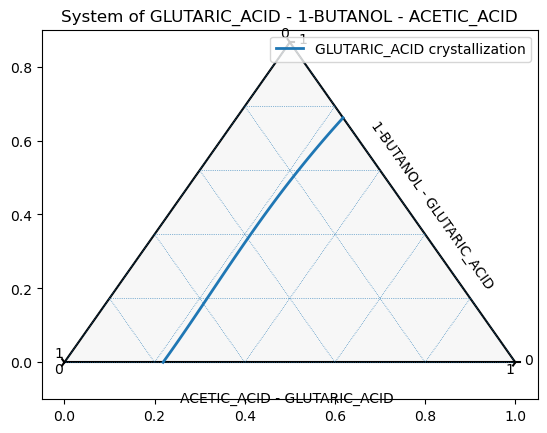

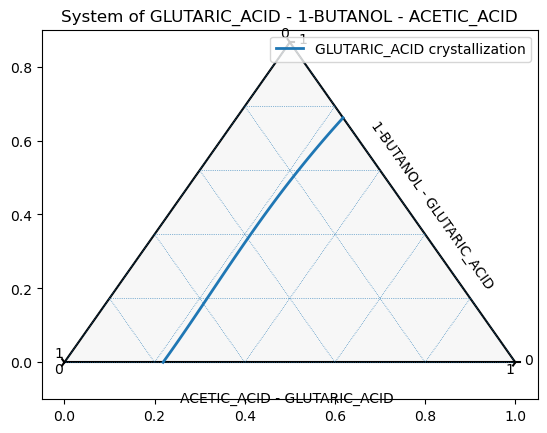

In [8]:
system.plot_ternary(antisolv_calculator.ternary_data)

In [9]:
import antisolvent_calculate as anti_calc
ratios = anti_calc._calc_ratios(antisolv_calculator.ternary_data)
print(ratios)

{'capacity_ratio': array([        nan,  0.31040888,  0.31195358,  0.31356432,  0.31524479,
        0.31699735,  0.31882319,  0.32072593,  0.32270781,  0.32477302,
        0.32692381,  0.3291639 ,  0.33149532,  0.33392221,  0.33644809,
        0.33907616,  0.3418113 ,  0.34465684,  0.34761693,  0.35069636,
        0.35389853,  0.35722876,  0.36069194,  0.36429316,  0.36803775,
        0.3719309 ,  0.3759793 ,  0.38018858,  0.38456516,  0.38911576,
        0.39384745,  0.39876769,  0.40388464,  0.40920576,  0.41474021,
        0.42049716,  0.42648632,  0.43271796,  0.43920297,  0.44595291,
        0.45298006,  0.46029746,  0.46791868,  0.47585931,  0.48413477,
        0.49276203,  0.50175923,  0.51114587,  0.52094286,  0.53117274,
        0.54185979,  0.55303023,  0.56471241,  0.57693706,  0.58973755,
        0.60315014,  0.6172144 ,  0.63197348,  0.64747465,  0.66376974,
        0.6809157 ,  0.69897534,  0.71801799,  0.73812049,  0.75936816,
        0.78185605,  0.80569036,  0.83099014,

In [10]:
moles = anti_calc._calc_moles(antisolv_calculator.init_frac, ratios)
print(moles)

{'add_antisolv_mole': array([            nan, -1.13164984e-03, -2.31177781e-03, -3.54235584e-03,
       -4.82620760e-03, -6.16513466e-03, -7.56005184e-03, -9.01371091e-03,
       -1.05278409e-02, -1.21056242e-02, -1.37487970e-02, -1.54601912e-02,
       -1.72413545e-02, -1.90954582e-02, -2.10251925e-02, -2.30329990e-02,
       -2.51226012e-02, -2.72965503e-02, -2.95580097e-02, -3.19106500e-02,
       -3.43570552e-02, -3.69012997e-02, -3.95471115e-02, -4.22983852e-02,
       -4.51591922e-02, -4.81334963e-02, -5.12264144e-02, -5.44422390e-02,
       -5.77858723e-02, -6.12624583e-02, -6.48774003e-02, -6.86363791e-02,
       -7.25456478e-02, -7.66109052e-02, -8.08391352e-02, -8.52373527e-02,
       -8.98129739e-02, -9.45738490e-02, -9.95282971e-02, -1.04685145e-01,
       -1.10053772e-01, -1.15644152e-01, -1.21466645e-01, -1.27533156e-01,
       -1.33855481e-01, -1.40446568e-01, -1.47320291e-01, -1.54491532e-01,
       -1.61976281e-01, -1.69791749e-01, -1.77956485e-01, -1.86490521e-01,
   

In [11]:
# # Load antisolvent data
# with open("./data/antisolvent_properties.json", "r") as json_file:
#     antisolv_data = json.load(json_file)

In [12]:
# system = tc()
# system.add_solute(**solute)
# system.add_solvent(**solvent)
# fig = plt.figure()
# plt.hlines(0, 0, 100, colors="black", linestyles="dashed")
# for antisolvent in antisolv_data:
#     system.add_antisolvent(**antisolvent)
#     antisolv_calculator = ac(system, trace=False)
#     result = antisolv_calculator.get_data(
#         export="csv", file_name=f"./data/calculate_{antisolvent['name']}.csv"
#     )
#     plt.plot(
#         result["add_antisolv_mole"],
#         result["precip_mole"],
#         label=f"antisolvent: {system.mole_name[2]}",
#     )
#     system.clear_antisolvent()

In [13]:
import numpy as np

array_format = np.zeros(101)  # (ngrid,)
array_format[0] = np.nan
array_format[-1] = np.nan

array1 = array_format
array1[1:-1] = np.ones(99)
array1

array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan])